## Observations and Insights 

In [381]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [382]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].nunique()
number_of_mice


249

In [383]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate_mouse = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [384]:
# Optional: Get all the data for the duplicate mouse ID. 



In [385]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [386]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# USING NUMPY ^

mean_1 = clean_df.groupby(['Drug Regimen']).mean()
mean = pd.DataFrame(mean_1['Tumor Volume (mm3)'])
mean = mean.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume Mean'})

median_1 = clean_df.groupby(['Drug Regimen']).median()
median = pd.DataFrame(median_1['Tumor Volume (mm3)'])
median = median.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume Median'})

var_1 = clean_df.groupby(['Drug Regimen']).var()
var = pd.DataFrame(var_1['Tumor Volume (mm3)'])
var = var.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume Variance'})

std_1 = clean_df.groupby(['Drug Regimen']).std()
std = pd.DataFrame(std_1['Tumor Volume (mm3)'])
std = std.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume Standard Deviation'})

sem_1 = clean_df.groupby(['Drug Regimen']).sem()
sem = pd.DataFrame(sem_1['Tumor Volume (mm3)'])
sem = sem.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume SEM'})

summary_list = [mean,median,var,std]
mean.merge(median,on='Drug Regimen').merge(var,on='Drug Regimen').merge(std,on='Drug Regimen').merge(sem,on='Drug Regimen')

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [388]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

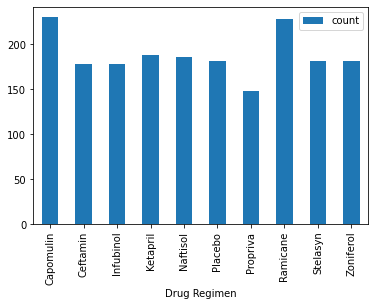

In [389]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['count'])
mice_count.plot.bar()

<BarContainer object of 10 artists>

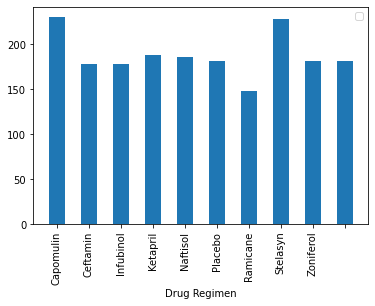

In [390]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
data = mice_count['count']
x_axis = np.arange(len(data))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 'Placebo', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.xlabel('Drug Regimen')
plt.legend(data, loc=1)
plt.bar(x_axis, data, width=0.5)



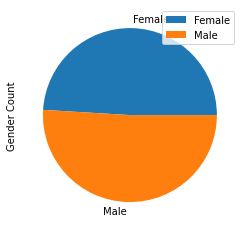

In [391]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df.groupby(['Sex']).count()
gender_df['Gender Count'] = clean_df.groupby(['Sex'])['Mouse ID'].count()
gender = pd.DataFrame(gender_df['Gender Count'])
gender.plot.pie(y='Gender Count')


([<matplotlib.patches.Wedge at 0x7fd173c6eac8>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

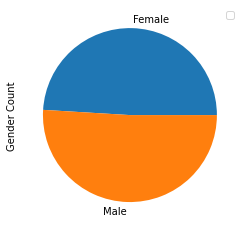

In [392]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
data_1 = gender['Gender Count']
plt.legend(labels, loc='best')
plt.ylabel('Gender Count')

plt.pie(data_1, labels=labels)



## Quartiles, Outliers and Boxplots

In [393]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

timepoint_df = pd.DataFrame(clean_df.groupby(["Mouse ID"])['Timepoint'].max())

final_tumor = timepoint_df.merge(clean_df)
final_tumor

capo = final_tumor.loc[final_tumor['Drug Regimen'] == ('Capomulin')]
ram = final_tumor.loc[final_tumor['Drug Regimen'] == 'Ramicane']
infub = final_tumor.loc[final_tumor['Drug Regimen'] == 'Infubinol']
ceft = final_tumor.loc[final_tumor['Drug Regimen'] == 'Ceftamin']
concat = pd.concat([capo,ram,infub,ceft])
final_df = concat[['Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [394]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound
upper_bound

outliers = final_df[(final_df['Tumor Volume (mm3)'] < 14.26404153 ) | (final_df['Tumor Volume (mm3)'] > 76.53062593)]
outliers


,Timepoint,Drug Regimen,Tumor Volume (mm3)


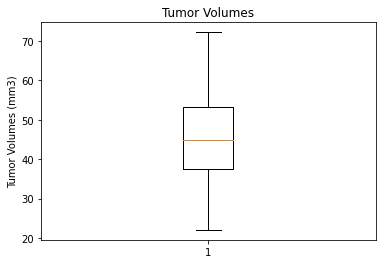

In [395]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


tum_vol = final_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tum_vol)
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


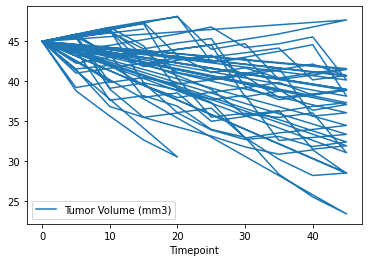

In [396]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_point = capo[['Timepoint', 'Tumor Volume (mm3)']]

#time_point.plot.line(x="Timepoint", y="Tumor Volume (mm3)")


#plt.plot(single_mouse_df['Timepoint'],single_mouse_df['Tumor Volume (mm3)'])
#plt.show()
capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df = capomulin[['Timepoint', 'Tumor Volume (mm3)']]
capomulin_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
capomulin


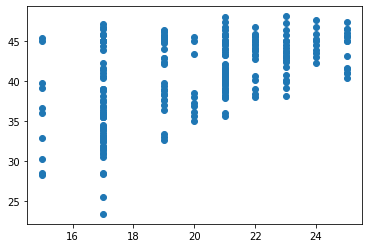

In [397]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(capomulin.iloc[:,4], capomulin.iloc[:,6])

## Correlation and Regression

In [398]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [399]:
correlation = st.pearsonr(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


Text(0, 0.5, 'Tumor Volume')

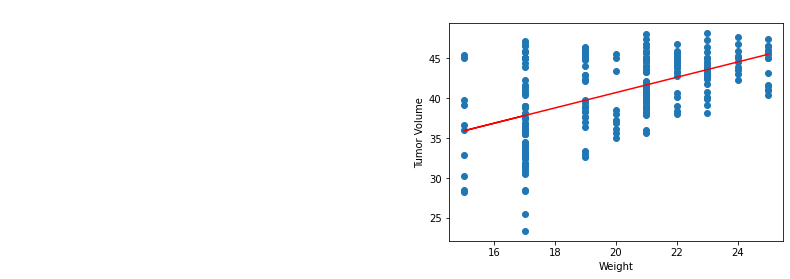

In [402]:
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')